# Chapter 11. Retaining customers

## 11.1 Customer churn and retention

Customer churn is when a customer decides to stop using services, content, or products from a company. It is much less expensive to retain existing customers than to acquire new customers, and the revenue from repeat customers is typically higher than that form new customers. In competitive industries, where a business faces many competitors, the cost of new customer acquisition is even higher, and retaining existing customers becomes more important for such businesses.

There are many reasons behind customers leaving a business. Some of the common reasons why customers churn are poor customer service, not finding enough value in the products or services, lack of communications, and lack of customer loyalty. The first step to retaining these customers is to monitor customer churn rates over time. If the churn rate is generally high or is increasing over time, then it will be a good idea to dedicate some resources to improving customer retention

In order to improve the customer retention rate, the top priority should be to understand the customer better. You can survey customers who have already churned to understand why they left. You can also survey existing customers to understand what their needs are and what their pain points are. A data science and data analytics approach would be to look into the data. For example, you can look at customers' web activity data and understand where they spend the most time, whether there were errors on the pages that they were looking at, or whether their search results did not return good content. You can also look into the customer service call logs to understand how long their wait time was, what their complaints were, and how their issues were handled. Conducting deep analyses on these data points can reveal the problems that a business is facing in retaining its existing customers.

## 11.2 Artificial neural networks

**Multilayer perceptron (MLP)**: a neural network model that has at least one or more hidden layers of nodes. Including one layer for the input and another layer for the output, the MLP model consists of at least three or more layers of nodes

## 11.3 Predicting customer churn with python

In [3]:
import pandas as pd
df = pd.read_csv('/Users/boyuan/Desktop/OneDrive/Hands on data science for martketing/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data analysis and preparation

In [7]:
for col in list(df.columns):
    print(col, df[col].nunique())

customerID 7043
gender 2
SeniorCitizen 2
Partner 2
Dependents 2
tenure 73
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 1585
TotalCharges 6531
Churn 2


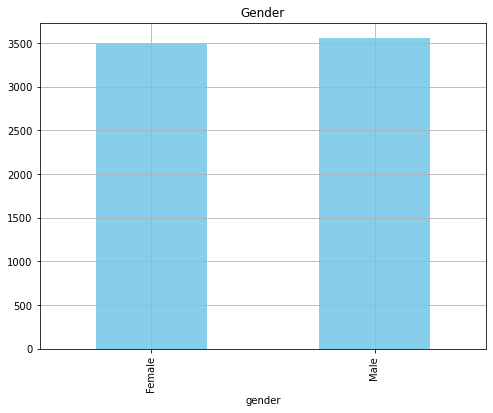

In [8]:
import matplotlib.pyplot as plt
df.groupby('gender').count()['customerID'].plot(
    kind = 'bar', color = 'skyblue', grid = True, figsize = (8, 6), title = 'Gender'
)
plt.show()

In [9]:
import numpy as np 

# Target variable encoding 
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Handling missing values in the TotalCharges column
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)
df = df.dropna()

# Transforming continuous variables 
df['MonthlyCharges'] = np.log(df['MonthlyCharges'])
df['MonthlyCharges'] = (df['MonthlyCharges'] - df['MonthlyCharges'].mean())/df['MonthlyCharges'].std()
df['TotalCharges'] = np.log(df['TotalCharges'])
df['TotalCharges'] = (df['TotalCharges'] - df['TotalCharges'].mean())/df['TotalCharges'].std()
df['tenure'] = (df['tenure'] - df['tenure'].mean())/df['tenure'].std()

# One-hot encoding categorical variables
dummy_cols = []

sample_set = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].copy(deep = True)

for col in list(df.columns):
    if col not in ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'] and df[col].nunique() < 5:
        dummy_vars = pd.get_dummies(df[col])
        dummy_vars.columns = [col + str(x) for x in dummy_vars.columns]
        sample_set = pd.concat([sample_set, dummy_vars], axis = 1)

sample_set.head(10)

,tenure,MonthlyCharges,TotalCharges,Churn,genderFemale,genderMale,SeniorCitizen0,SeniorCitizen1,PartnerNo,PartnerYes,...,StreamingMoviesYes,ContractMonth-to-month,ContractOne year,ContractTwo year,PaperlessBillingNo,PaperlessBillingYes,PaymentMethodBank transfer (automatic),PaymentMethodCredit card (automatic),PaymentMethodElectronic check,PaymentMethodMailed check
0,-1.280157,-1.054244,-2.281382,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,0.064298,0.032896,0.389269,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,-1.239416,-0.061298,-1.452520,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0.512450,-0.467578,0.372439,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,-1.239416,0.396862,-1.234860,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
5,-0.994970,0.974468,-0.147808,1,1,0,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0
6,-0.424595,0.786142,0.409363,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
7,-0.913487,-1.059891,-0.791550,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
8,-0.180148,1.059269,0.696733,1,1,0,1,0,0,1,...,1,1,0,0,0,1,0,0,1,0
9,1.205048,0.009088,0.783956,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0


### ANN with Keras

In [18]:
from keras.models import Sequential
from keras.layers import Dense

target_var = 'Churn'
features = [x for x in list(sample_set.columns) if x != target_var]

model = Sequential()
model.add(Dense(16, input_dim = len(features), activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    sample_set[features],
    sample_set[target_var],
    test_size = 0.3
)

model.fit(X_train, y_train, epochs = 50, batch_size = 100)

Epoch 1/50
50/50 [==============================] - 0s 850us/step - loss: 0.5506 - accuracy: 0.7395
Epoch 2/50
50/50 [==============================] - 0s 721us/step - loss: 0.4654 - accuracy: 0.7755
Epoch 3/50
50/50 [==============================] - 0s 820us/step - loss: 0.4315 - accuracy: 0.7940
Epoch 4/50
50/50 [==============================] - 0s 720us/step - loss: 0.4235 - accuracy: 0.7980
Epoch 5/50
50/50 [==============================] - 0s 693us/step - loss: 0.4188 - accuracy: 0.8009
Epoch 6/50
50/50 [==============================] - 0s 752us/step - loss: 0.4171 - accuracy: 0.8009
Epoch 7/50
50/50 [==============================] - 0s 718us/step - loss: 0.4131 - accuracy: 0.8039
Epoch 8/50
50/50 [==============================] - 0s 776us/step - loss: 0.4117 - accuracy: 0.8066
Epoch 9/50
50/50 [==============================] - 0s 754us/step - loss: 0.4098 - accuracy: 0.8064
Epoch 10/50
50/50 [==============================] - 0s 867us/step - loss: 0.4090 - accuracy: 0.8072

### Model evaluations

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

in_sample_preds = [round(x[0]) for x in model.predict(X_train)]
out_sample_preds = [round(x[0]) for x in model.predict(X_test)]

# Accuracy
print('In-Sample Accuracy: %0.4f' % accuracy_score(y_train, in_sample_preds))
print('Out-of-Sample Accuracy: %0.4f' % accuracy_score(y_test, out_sample_preds))
# Precision
print('In-Sample Precision: %0.4f' % precision_score(y_train, in_sample_preds))
print('Out-of-Sample Precision: %0.4f' % precision_score(y_test, out_sample_preds))
# Recall
print('In-Sample Recall: %0.4f' % recall_score(y_train, in_sample_preds))
print('Out-of-Sample Recall: %0.4f' % recall_score(y_test, out_sample_preds))

In-Sample Accuracy: 0.8157
Out-of-Sample Accuracy: 0.7986
In-Sample Precision: 0.6947
Out-of-Sample Precision: 0.6689
In-Sample Recall: 0.5355
Out-of-Sample Recall: 0.5113


In [21]:
from sklearn.metrics import roc_curve, auc

in_sample_preds = [x[0] for x in model.predict(X_train)]
out_sample_preds = [x[0] for x in model.predict(X_test)]

in_sample_fpr, in_sample_tpr, in_sample_thresholds = roc_curve(y_train, in_sample_preds)
out_sample_fpr, out_sample_tpr, out_sample_thresholds = roc_curve(y_test, out_sample_preds)
in_sample_roc_auc = auc(in_sample_fpr, in_sample_tpr)
out_sample_roc_auc = auc(out_sample_fpr, out_sample_tpr)

print('In-Sample AUC: %0.4f' % in_sample_roc_auc)
print('Out-Sample AUC: %0.4f' % out_sample_roc_auc)

In-Sample AUC: 0.8678
Out-Sample AUC: 0.8445


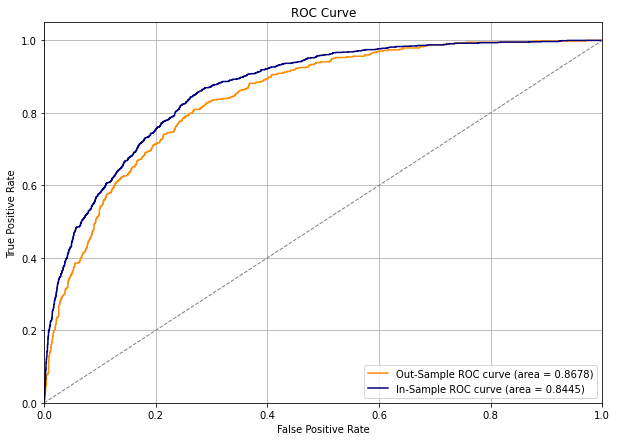

In [22]:
plt.figure(figsize=(10,7))

plt.plot(
    out_sample_fpr, out_sample_tpr, color='darkorange', label='Out-Sample ROC curve (area = %0.4f)' % in_sample_roc_auc
)
plt.plot(
    in_sample_fpr, in_sample_tpr, color='navy', label='In-Sample ROC curve (area = %0.4f)' % out_sample_roc_auc
)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.show()

## 11.4 Predicting customer churn with r